In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [4]:

fsamp = 5000

freq = 10
amp1 = 0
amp2 = 0

noise_rms1 = 10
noise_rms2 = 10

t=10
dt = 1. / fsamp
nsamp = int(t / dt)
time = np.arange(nsamp) * dt

noise1 = noise_rms1 * np.random.randn(nsamp)
noise2 = noise_rms2 * np.random.randn(nsamp)

sig_1 = amp1 * np.sin(2 * np.pi * freq * time+np.pi/2) + noise1
sig_2 = amp2 * np.sin(2 * np.pi * freq * time+np.pi) + noise2
# sig_2 = np.roll(sig_2, 125)

<IPython.core.display.Javascript object>


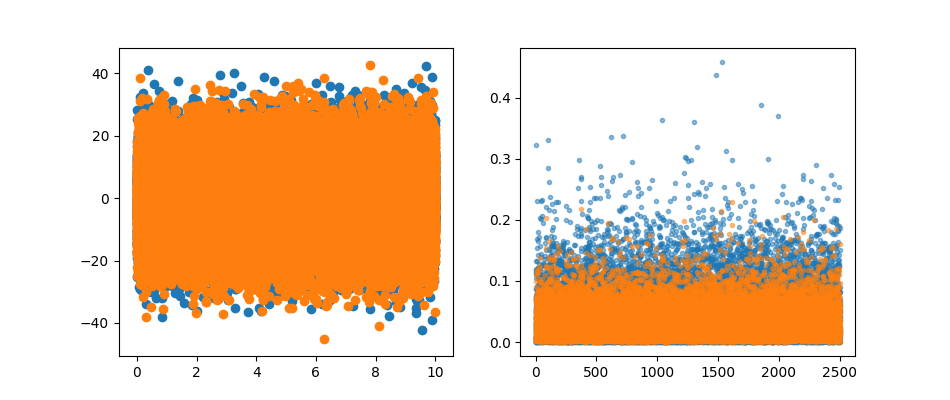

csd mean:  0.03143492472349553 , std:  0.024787331661118756
psd mean:  0.04013558599365855 , std:  0.04021604488033897
csd phase:  [1.36424113]


In [5]:
psd_1, freqs = mlab.psd(sig_1, NFFT=nsamp, Fs=fsamp, window=mlab.window_none)
psd_2, _ = mlab.psd(sig_2, NFFT=nsamp, Fs=fsamp, window=mlab.window_none)
csd, _ = mlab.csd(sig_1, sig_2, NFFT=nsamp, Fs=fsamp, window=mlab.window_none)

_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(time, sig_1)
ax[0].scatter(time, sig_2)
# ax[0].scatter(freqs, np.angle(csd))

# ax[1].plot(freqs, psd_1, '.')
ax[1].plot(freqs, psd_2, '.', alpha=0.5)
ax[1].plot(freqs, np.abs(csd), '.', alpha=0.5)
# ax[1].set(xlim=(100,200))

print('csd mean: ', np.mean(np.abs(csd)), ', std: ', np.std(np.abs(csd)))
print('psd mean: ', np.mean(psd_1), ', std: ', np.std(psd_1))
print('csd phase: ', np.angle(csd[freqs==freq]))

In [6]:
fftfreqs = np.fft.rfftfreq(nsamp, d=dt)

npfft1 = np.fft.rfft(sig_1, norm='ortho')
npfft2 = np.fft.rfft(sig_2, norm='ortho')

np.angle(npfft2[fftfreqs==freq])/np.pi

array([0.88248589])

In [7]:
fname = r'/data/new_trap/20200107/Bead3/InitialTest/Data36.h5'
bdf = BeadDataFile.BeadDataFile(fname=fname)

No electrodes data
No cantilever data


In [8]:
xx = bdf.x2/np.mean(bdf.x2)
yy = bdf.y2/np.mean(bdf.y2)
zz = bdf.z2/np.mean(bdf.z2)*30

<IPython.core.display.Javascript object>


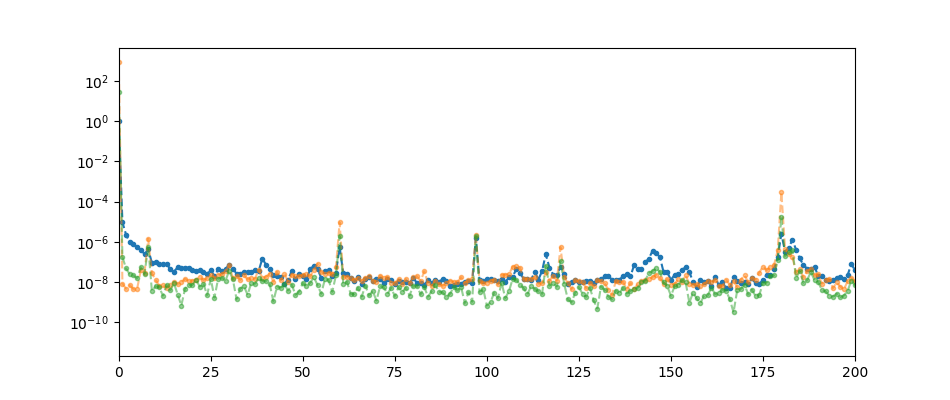

csd mean:  1.0515611014336524e-08 , std:  1.837659248420034e-08
psd1 mean:  4.4790426270247724e-08 , std:  7.061831126130984e-08
psd2 mean:  2.5227476194488497e-08 , std:  7.382891853194712e-08
csd phase:  [-1.72231073]


In [9]:
psd_1, freqs = mlab.psd(xx, NFFT=5000, Fs=fsamp, window=mlab.window_none)
psd_2, _ = mlab.psd(zz, NFFT=5000, Fs=fsamp, window=mlab.window_none)
csd, _ = mlab.csd(xx, zz, NFFT=5000, Fs=fsamp, window=mlab.window_none)

_,ax = plt.subplots(figsize=(9.5,4))

ax.semilogy(freqs, psd_1, '.--')
ax.semilogy(freqs, psd_2, '.--', alpha=0.5)
ax.semilogy(freqs, np.abs(csd), '.--', alpha=0.5)
ax.set(xlim=(0,200))

print('csd mean: ', np.mean(np.abs(csd[(freqs>100)*(freqs<150)])), ', std: ', np.std(np.abs(csd[(freqs>100)*(freqs<150)])))
print('psd1 mean: ', np.mean(psd_1[(freqs>100)*(freqs<150)]), ', std: ', np.std(psd_1[(freqs>100)*(freqs<150)]))
print('psd2 mean: ', np.mean(psd_2[(freqs>100)*(freqs<150)]), ', std: ', np.std(psd_2[(freqs>100)*(freqs<150)]))
print('csd phase: ', np.angle(csd[freqs==freq]))

<IPython.core.display.Javascript object>


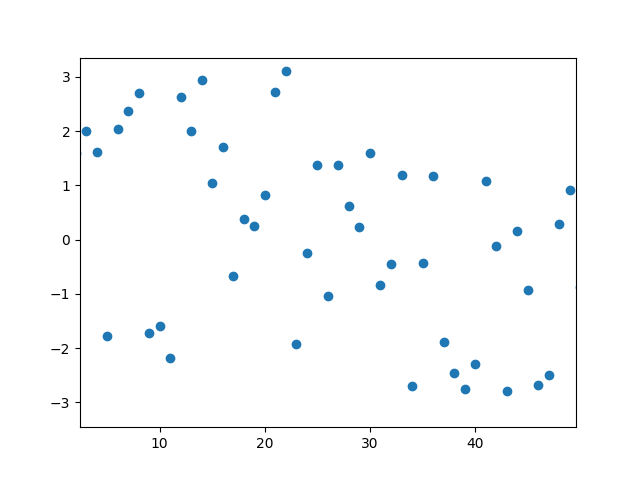

[(0, 200)]

In [20]:
_,ax = plt.subplots()
ax.scatter(range(len(csd[1:])),np.angle(csd[1:]))
ax.set(xlim=(0,200))